In [89]:
!pip3 install pandas

In [90]:
!pip3 install matplotlib

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('hip_lite_major.csv')


for index in list(df.columns):
    if index=='赤緯（符号）':
        pm=list(df[index])
        pm=[-1 if x ==0 else 1 for x in pm]
        df[index]=pm
    elif index in ('経秒','秒緯','等級'):
        df[index]=df[index].astype(float)
    else:
        df[index]=df[index].astype(int)


df['経度（度）']=(df['赤経（時）']+df['分経']/60+df['秒経']/3600)*15
df['緯度（度）']=-1*((df['赤緯（符号）']*(df['度緯']+df['分緯']/60+df['秒緯']/3600))-90) #北を0南を180


latitude=df['緯度（度）'].values
longitude=df['経度（度）'].values
lum=df['等級'].values




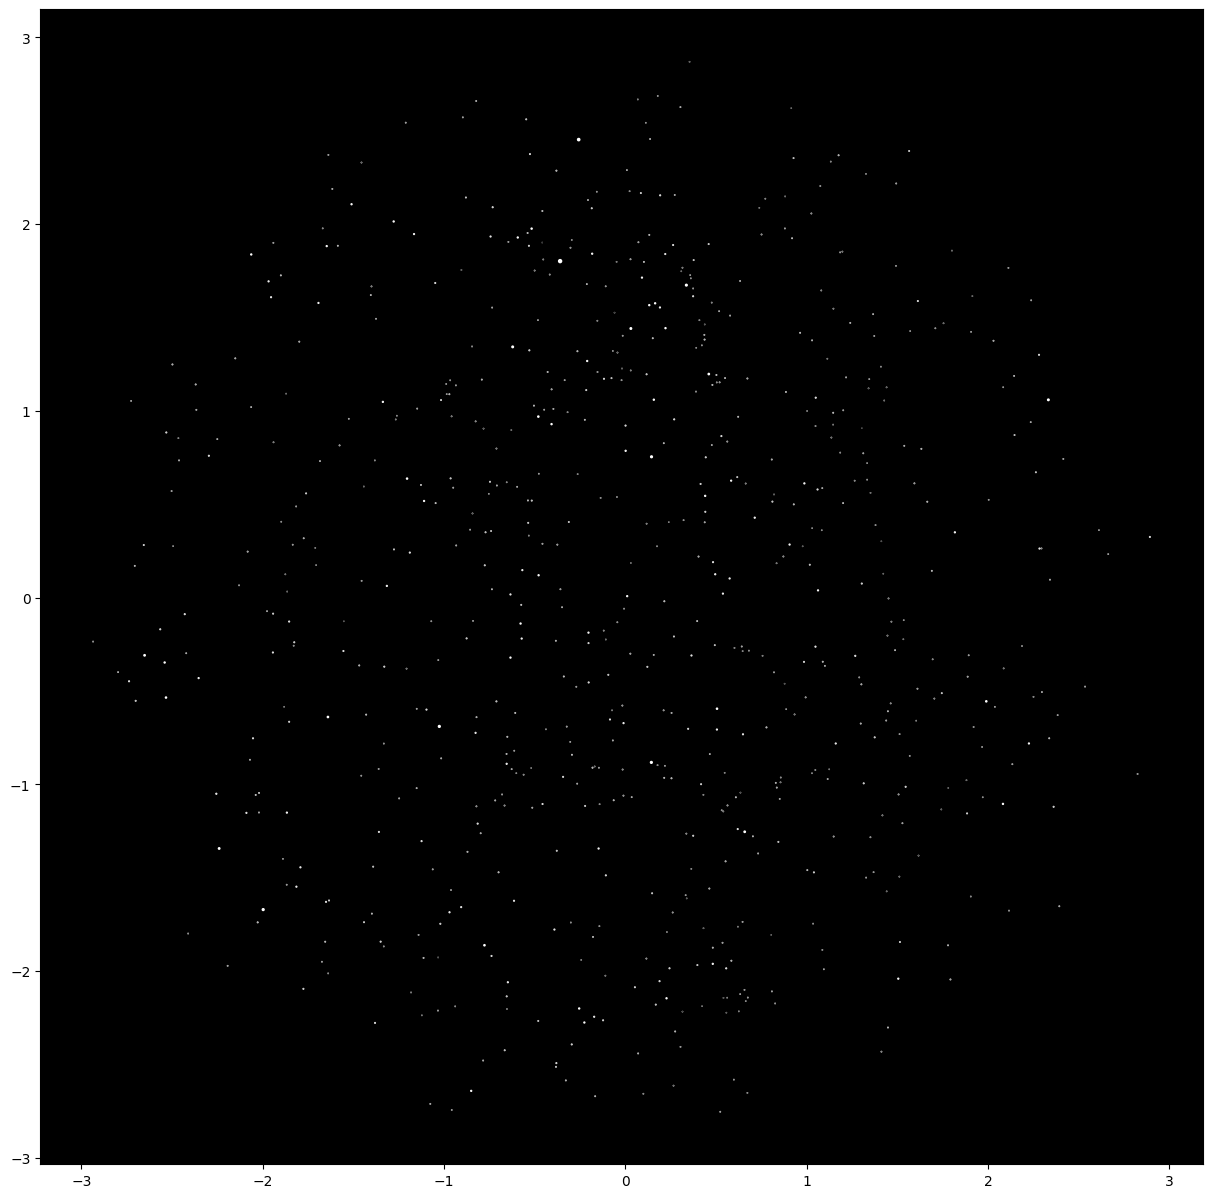

In [88]:
size=7*np.exp(-1*(lum+2)*np.log(2))

r=1 #半径
x=r*np.pi*latitude/180*np.cos(longitude*np.pi/180)
y=r*np.pi*latitude/180*np.sin(longitude*np.pi/180)

fig, ax = plt.subplots(figsize=(15,15))

ax.patch.set_facecolor('black')

ax.scatter(x,y,s=size,color='white')
plt.show()

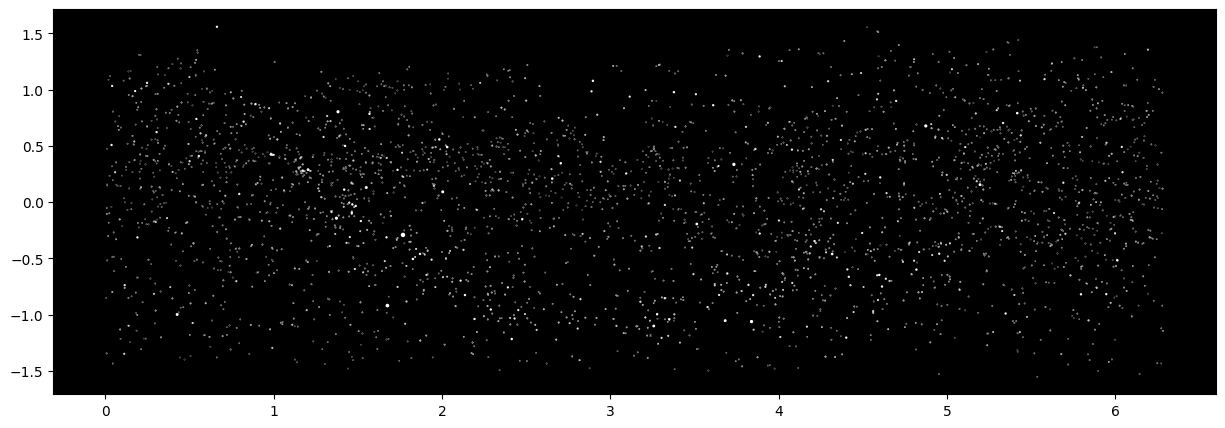

In [47]:
size=7*np.exp(-1*(lum+2)*np.log(2))

r=1 #半径

x=r*np.pi*longitude/180
y=r*np.pi*(-1*latitude+90)/180
fig, ax = plt.subplots(figsize=(15,5))

ax.patch.set_facecolor('black')

ax.scatter(x,y,s=size,color='white')
plt.show()

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('hip_constellation_line_star.csv')
droplist=['a','b','c','d','e','f']
#print(df.head())

for i in droplist:
    df=df.drop(i,axis=1)

#print(df.head())
for index in list(df.columns):
    if index=='赤緯（符号）':
        pm=list(df[index])
        pm=[-1 if x ==0 else 1 for x in pm]
        df[index]=pm
    elif index in ('経秒','秒緯','等級'):
        df[index]=df[index].astype(float)
    else:
        df[index]=df[index].astype(int)


df['経度（度）']=(df['赤経（時）']+df['分経']/60+df['秒経']/3600)*15
df['緯度（度）']=-1*((df['度緯']+df['分緯']/60+df['秒緯']/3600)-90) #北を0南を180

latitude=df['緯度（度）'].values
longitude=df['経度（度）'].values
lum=df['等級'].values


df2=pd.read_csv('hip_constellation_line.csv')
for i in ['dot1','dot2']:
    df2[i]=df2[i].astype(int)
dot1=df2['dot1'].values
dot2=df2['dot2'].values
dots=list(df2['dot1'].values)
cnt=len(dots)
dots.extend(list(df2['dot2'].values))
dots=set(dots)

c_table={}

for i in dots:
    index = df.loc[df['HIP番号'] == i].index[0]
    c_table[i]=index


0.735861111111106 172.3321388888889


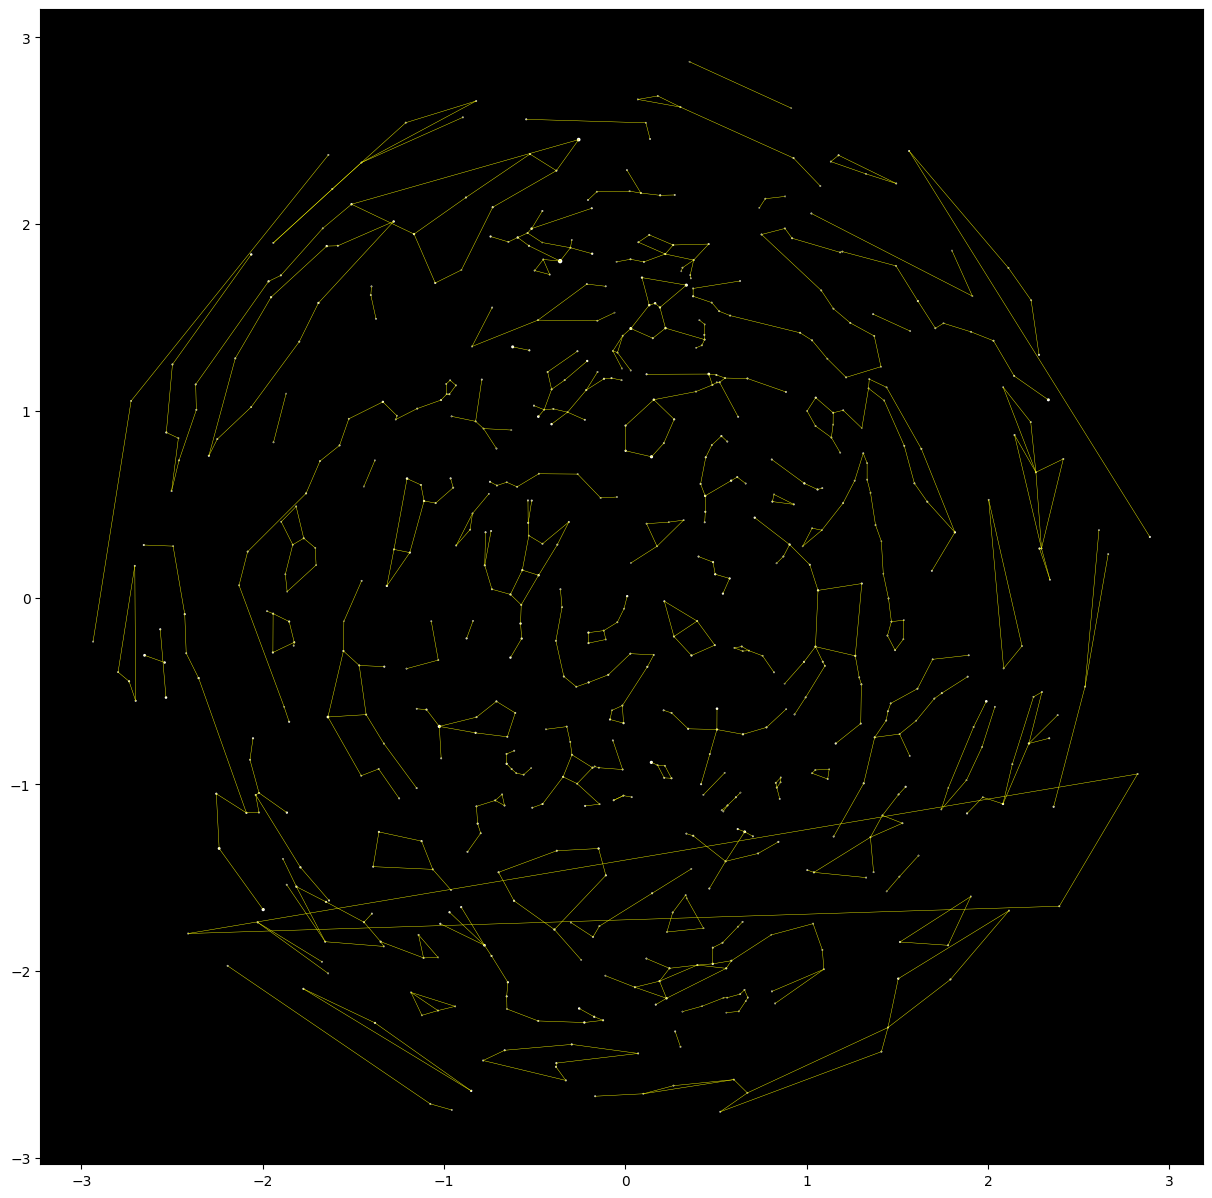

In [86]:

size=7*np.exp(-1*(lum+2)*np.log(2))
r=1 #半径
x=r*np.pi*latitude/180*np.cos(longitude*np.pi/180)
y=r*np.pi*latitude/180*np.sin(longitude*np.pi/180)

fig, ax = plt.subplots(figsize=(15,15))

ax.patch.set_facecolor('black')

ax.scatter(x,y,s=size,color='white')

for i in range(cnt):
    x1,x2,y1,y2=x[c_table[dot1[i]]],x[c_table[dot2[i]]],y[c_table[dot1[i]]],y[c_table[dot2[i]]]
    plt.plot((x1,x2),(y1,y2),linewidth=0.3,color='yellow')
plt.show()

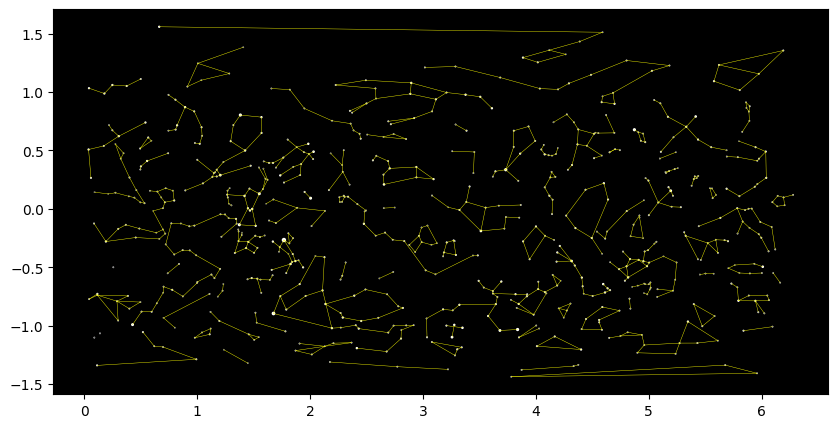

In [91]:
size=7*np.exp(-1*(lum+2)*np.log(2))

r=1 #半径


x=r*np.pi*longitude/180
y=r*np.pi*(-1*latitude+90)/180
fig, ax = plt.subplots(figsize=(10,5))

ax.patch.set_facecolor('black')

ax.scatter(x,y,s=size,color='white')
for i in range(cnt):
    x1,x2,y1,y2=x[c_table[dot1[i]]],x[c_table[dot2[i]]],y[c_table[dot1[i]]],y[c_table[dot2[i]]]
    if abs(x2-x1)>5:
        continue
    plt.plot((x1,x2),(y1,y2),linewidth=0.3,color='yellow')
plt.show()

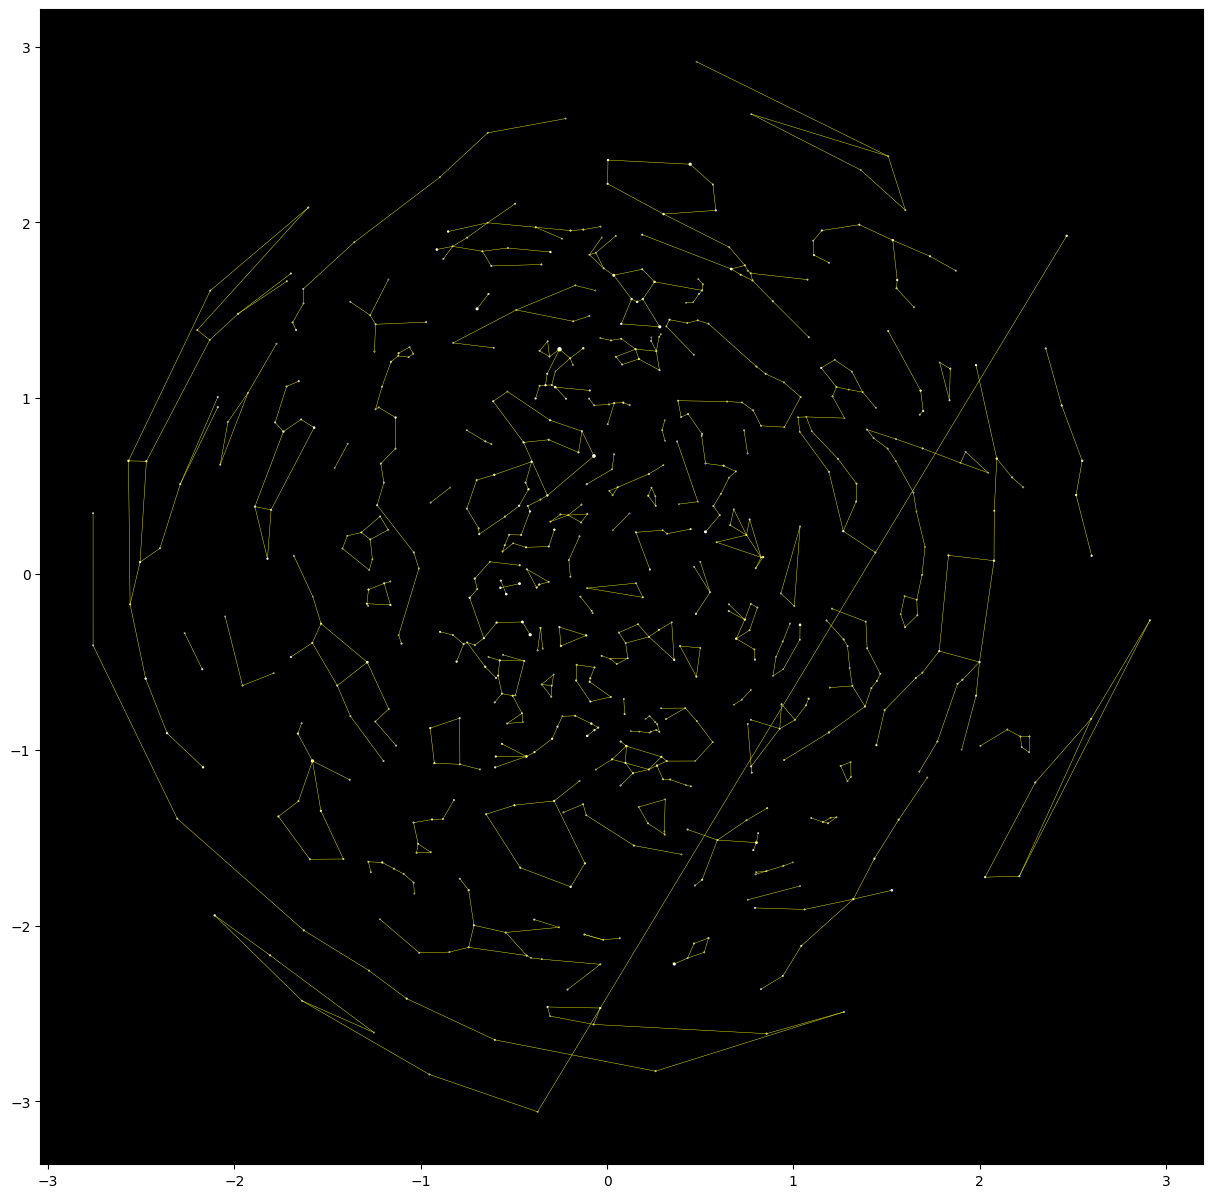

In [92]:

size=7*np.exp(-1*(lum+2)*np.log(2))
r=1 #半径
x=r*np.pi*(180-latitude)/180*np.cos(longitude*np.pi/180)
y=r*np.pi*(180-latitude)/180*np.sin(longitude*np.pi/180)

fig, ax = plt.subplots(figsize=(15,15))

ax.patch.set_facecolor('black')

ax.scatter(x,y,s=size,color='white')

for i in range(cnt):
    x1,x2,y1,y2=x[c_table[dot1[i]]],x[c_table[dot2[i]]],y[c_table[dot1[i]]],y[c_table[dot2[i]]]
    plt.plot((x1,x2),(y1,y2),linewidth=0.3,color='yellow')
plt.show()